In [1]:
import pandas as pd
import numpy as np

from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
all_df = pd.read_csv("../Dataset/final_data/final_data.csv")

In [3]:
all_df['risk'] = [0 if r < 50 else 1 for r in all_df['diversity_At-Risk_(%)']]

In [4]:
all_df.columns


Index(['Unnamed: 0', 'Unnamed: 0_x', 'School_Code', 'STAR_Score_18',
       'STAR_Rating_18', 'STAR_Score_19', 'STAR_Rating_19', 'STAR_Score_inc',
       'STAR_Score_change', 'STAR_Rating_change', 'Unnamed: 0_y', 'schoolname',
       'level', 'schtype_raw_DC', 'Dist_Code', 'distname',
       'pp_total_raw_DC_1819', 'pp_site_raw_DC_1819',
       'pp_centshare_raw_DC_1819', 'schoolstloc_raw_DC_1819',
       'enroll_raw_DC_1819', 'pp_total_raw_DC_1920', 'pp_site_raw_DC_1920',
       'pp_centshare_raw_DC_1920', 'schoolstloc_raw_DC_1920',
       'enroll_raw_DC_1920', 'pp_total_raw_DC_inc(%)', 'pp_total_raw_DC_inc',
       'pp_site_raw_DC_inc(%)', 'pp_site_raw_DC_inc',
       'pp_centshare_raw_DC_inc(%)', 'pp_centshare_raw_DC_inc',
       'schoolstloc_raw_DC_inc(%)', 'schoolstloc_raw_DC_inc',
       'enroll_raw_DC_inc(%)', 'enroll_raw_DC_inc', 'diversity_Unnamed: 0',
       'Ward', 'Total_Count_of_Students', 'diversity_At-Risk_(%)',
       'diversity_Socieconomic_Diversity_Score,_2018-19_(%)

# Regression Model 

## Analyzing the effect of change in per-pupil expenditures on the change in STAR score 

In [15]:
prestige_model = ols("enroll_raw_DC_1920 ~ pp_total_raw_DC_1920", data=all_df).fit()
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:     enroll_raw_DC_1920   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     21.26
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           6.69e-06
Time:                        16:20:29   Log-Likelihood:                -1564.4
No. Observations:                 230   AIC:                             3133.
Df Residuals:                     228   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              688.6891 

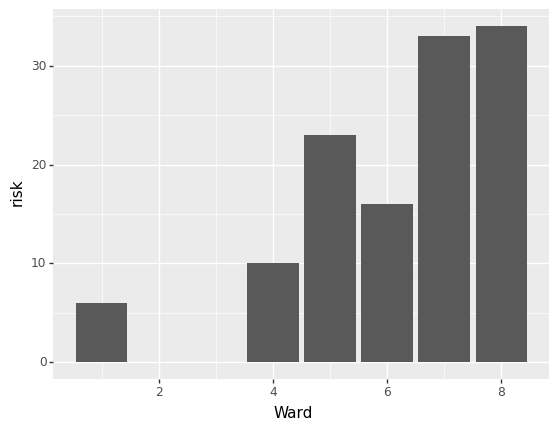

<ggplot: (351421395)>

In [13]:
from plotnine import *
(ggplot( all_df, aes(x='Ward', y='risk')) +
    geom_col())

In [26]:
star_pp = ols("STAR_Score_19~ pp_total_raw_DC_1819", data=all_df).fit()
print(star_pp.summary())

                            OLS Regression Results                            
Dep. Variable:          STAR_Score_19   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     34.34
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           1.60e-08
Time:                        16:37:48   Log-Likelihood:                -1022.6
No. Observations:                 231   AIC:                             2049.
Df Residuals:                     229   BIC:                             2056.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               83.5295 

In [27]:
star_enr = ols("STAR_Score_19~ enroll_raw_DC_1920", data=all_df).fit()
print(star_pp.summary())

                            OLS Regression Results                            
Dep. Variable:          STAR_Score_19   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     34.34
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           1.60e-08
Time:                        16:38:22   Log-Likelihood:                -1022.6
No. Observations:                 231   AIC:                             2049.
Df Residuals:                     229   BIC:                             2056.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               83.5295 

In [29]:
pp_risk = ols("pp_total_raw_DC_1819~risk", data=all_df).fit()
print(pp_risk.summary())

                             OLS Regression Results                             
Dep. Variable:     pp_total_raw_DC_1819   R-squared:                       0.081
Model:                              OLS   Adj. R-squared:                  0.077
Method:                   Least Squares   F-statistic:                     20.29
Date:                  Tue, 06 Dec 2022   Prob (F-statistic):           1.06e-05
Time:                          17:05:12   Log-Likelihood:                -2298.6
No. Observations:                   231   AIC:                             4601.
Df Residuals:                       229   BIC:                             4608.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.977e+04    488.040